In [0]:
import os
import zipfile
import random
import tensorflow as tf
import shutil
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
from os import getcwd

In [0]:
local_zip = "drive/My Drive/train.zip"
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('train')
zip_ref.close()

In [0]:
# Use os.mkdir to create your directories
# You will need a directory for cats-v-dogs, and subdirectories for training
# and testing. These in turn will need subdirectories for 'cats' and 'dogs'
try:
    os.mkdir("cats-vs-dogs")
    os.mkdir("cats-vs-dogs/training")
    os.mkdir("cats-vs-dogs/testing")
    os.mkdir("cats-vs-dogs/training/cats")
    os.mkdir("cats-vs-dogs/training/dogs")
    os.mkdir("cats-vs-dogs/testing/cats")
    os.mkdir("cats-vs-dogs/testing/dogs")
except OSError:
    pass

In [0]:
# Write a python function called split_data which takes
# a SOURCE directory containing the files
# a TRAINING directory that a portion of the files will be copied to
# a TESTING directory that a portion of the files will be copie to
# a SPLIT SIZE to determine the portion
# The files should also be randomized, so that the training set is a random
# X% of the files, and the test set is the remaining files
# SO, for example, if SOURCE is PetImages/Cat, and SPLIT SIZE is .9
# Then 90% of the images in PetImages/Cat will be copied to the TRAINING dir
# and 10% of the images will be copied to the TESTING dir
# Also -- All images should be checked, and if they have a zero file length,
# they will not be copied over
#
# os.listdir(DIRECTORY) gives you a listing of the contents of that directory
# os.path.getsize(PATH) gives you the size of the file
# copyfile(source, destination) copies a file from source to destination
# random.sample(list, len(list)) shuffles a list
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
# YOUR CODE STARTS HERE
    dataset = []
    
    for file in os.listdir(SOURCE):
        data = SOURCE + file
        if (os.path.getsize(data) > 0):
            dataset.append(file)
        else:
            print('Skipped ' + file)
            print('Zero length.')
    
    training_set_len = int(len(dataset) * SPLIT_SIZE)
    testing_set_len = int(len(dataset) - training_set_len)
    shuffled_set = random.sample(dataset, len(dataset))
    training_set = shuffled_set[0:training_set_len]
    testing_set = shuffled_set[training_set_len:]
    
    for file in training_set:
        temp_train_data = SOURCE + file
        final_train_data = TRAINING + file
        copyfile(temp_train_data, final_train_data)
    
    for file in testing_set:
        temp_test_data = SOURCE + file
        final_test_data = TESTING + file
        copyfile(temp_train_data, final_test_data)
# YOUR CODE ENDS HERE


CAT_SOURCE_DIR = "train/train/Cats/"
TRAINING_CATS_DIR = "cats-vs-dogs/training/cats/"
TESTING_CATS_DIR = "cats-vs-dogs/testing/cats/"
DOG_SOURCE_DIR = "train/train/Dogs/"
TRAINING_DOGS_DIR = "cats-vs-dogs/training/dogs/"
TESTING_DOGS_DIR = "cats-vs-dogs/testing/dogs/"

split_size = 0.9
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

In [0]:
# DEFINE A KERAS MODEL TO CLASSIFY CATS V DOGS
# USE AT LEAST 3 CONVOLUTION LAYERS
model = tf.keras.models.Sequential([# Note the input shape is the desired size of the image 150x150 with 3 bytes color
                                    tf.keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu, input_shape=(150, 150, 3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(128, (3,3), activation=tf.nn.relu),
                                    tf.keras.layers.MaxPooling2D(2,2), 
                                    tf.keras.layers.Conv2D(32, (1,1), activation=tf.nn.relu), 
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(128, (3,3), activation=tf.nn.relu), 
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    # Flatten the results to feed into a DNN
                                    tf.keras.layers.Flatten(), 
                                    # 512 neuron hidden layer
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu), 
                                    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
                                    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid) ])

model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['acc'])

In [6]:
TRAINING_DIR = "cats-vs-dogs/training/"
train_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))                                                   

VALIDATION_DIR = "cats-vs-dogs/testing/"
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=20,
                                                              class_mode='binary',
                                                              target_size=(150, 150))



#Output:Found 22500 images belonging to 2 classes.
#Found 2500 images belonging to 2 classes.

Found 22500 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [8]:
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch=1125,
                    epochs=15,
                    validation_steps=125,
                    verbose=2)


Epoch 1/15
1125/1125 - 76s - loss: 0.5881 - acc: 0.6832 - val_loss: 0.2041 - val_acc: 1.0000
Epoch 2/15
1125/1125 - 74s - loss: 0.4547 - acc: 0.7905 - val_loss: 0.0643 - val_acc: 1.0000
Epoch 3/15
1125/1125 - 74s - loss: 0.3897 - acc: 0.8297 - val_loss: 0.0490 - val_acc: 1.0000
Epoch 4/15
1125/1125 - 74s - loss: 0.3464 - acc: 0.8522 - val_loss: 0.1417 - val_acc: 1.0000
Epoch 5/15
1125/1125 - 74s - loss: 0.3196 - acc: 0.8678 - val_loss: 0.0060 - val_acc: 1.0000
Epoch 6/15
1125/1125 - 74s - loss: 0.2991 - acc: 0.8816 - val_loss: 0.0103 - val_acc: 1.0000
Epoch 7/15
1125/1125 - 72s - loss: 0.2849 - acc: 0.8877 - val_loss: 0.0362 - val_acc: 1.0000
Epoch 8/15
1125/1125 - 71s - loss: 0.2817 - acc: 0.8910 - val_loss: 0.0934 - val_acc: 1.0000
Epoch 9/15
1125/1125 - 71s - loss: 0.2767 - acc: 0.8943 - val_loss: 0.0343 - val_acc: 1.0000
Epoch 10/15
1125/1125 - 71s - loss: 0.2847 - acc: 0.8945 - val_loss: 0.0130 - val_acc: 1.0000
Epoch 11/15
1125/1125 - 71s - loss: 0.2717 - acc: 0.8972 - val_loss: 

No handles with labels found to put in legend.
No handles with labels found to put in legend.


Text(0.5, 1.0, 'Training and validation loss')

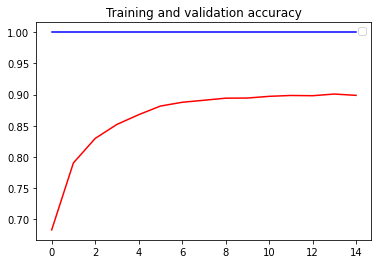

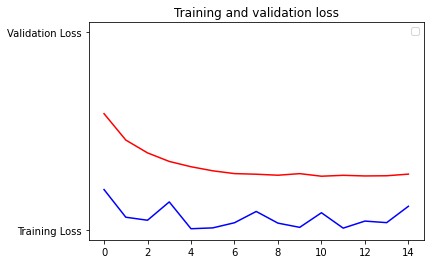

In [9]:
# PLOT LOSS AND ACCURACY
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.legend()

plt.title('Training and validation loss')

# Desired output. Charts with training and validation metrics. No crash :)

In [0]:
local_zip = "drive/My Drive/test1.zip"
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('test1')
zip_ref.close()


In [16]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import os

# image folder
folder_path = 'test1/test1/'

# dimensions of images
img_width, img_height = 150,150


# load all images into a list
images = []
for img in os.listdir(folder_path):
    img = os.path.join(folder_path, img)
    img = image.load_img(img, target_size=(img_width, img_height))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    images.append(img)

# stack up images list to pass for prediction
images = np.vstack(images)
classes = model.predict_classes(images, batch_size=10)
print(classes)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
[[0]
 [1]
 [0]
 ...
 [1]
 [1]
 [1]]


In [20]:
np.shape(classes)

(12500, 1)

In [22]:
y_pred=[]
for i in range(len(classes)):
  y_pred.append(classes[i][0])
y_pred


[0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,


In [0]:
import pandas as pd
result=pd.DataFrame({"id":range(1,12501),"label":y_pred})
result.head()
result_csv=result.to_csv("result_cats-n-dogs1.csv", encoding='utf-8', index=False)

In [0]:
from google.colab import files
files.download('result_cats-n-dogs1.csv')